In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import lightgbm
from lightgbm import LGBMRegressor
import seaborn as sns

In [375]:
train = pd.read_csv('C:/Users/doong/Desktop/PythonWorkspace/운송량예측공모전/train(전처리 끝).csv', encoding='utf-8')
test = pd.read_csv('C:/Users/doong/Desktop/PythonWorkspace/운송량예측공모전/test(전처리 끝).csv', encoding='utf-8')
ss = pd.read_csv('C:/Users/doong/Desktop/공모전/운송량 예측/235867_물류 유통량 예측 경진대회/sample_submission.csv', encoding='utf-8')

In [376]:
train.drop(["Unnamed: 0"], axis=1, inplace=True)
test.drop(["Unnamed: 0",'index'], axis=1, inplace=True)

In [377]:
train.drop("index", axis=1, inplace=True)

In [378]:
train.columns

Index(['SEND_SPG_INNB', 'REC_SPG_INNB', 'INVC_CONT', 'DL_GD_LCLS_NM_0',
       'DL_GD_LCLS_NM_1', 'DL_GD_LCLS_NM_2', 'DL_GD_LCLS_NM_3',
       'DL_GD_LCLS_NM_4', 'DL_GD_LCLS_NM_5', 'DL_GD_MCLS_NM_0',
       'DL_GD_MCLS_NM_1', 'DL_GD_MCLS_NM_2', 'DL_GD_MCLS_NM_3',
       'DL_GD_MCLS_NM_4', 'DL_GD_MCLS_NM_5', 'DL_GD_MCLS_NM_6',
       'DL_GD_MCLS_NM_7', 'DL_GD_MCLS_NM_8', 'DL_GD_MCLS_NM_9',
       'DL_GD_MCLS_NM_10', 'DL_GD_MCLS_NM_11', 'DL_GD_MCLS_NM_12',
       'DL_GD_MCLS_NM_13', 'DL_GD_MCLS_NM_14', 'DL_GD_MCLS_NM_15',
       'DL_GD_MCLS_NM_16', 'DL_GD_MCLS_NM_17', 'DL_GD_MCLS_NM_18',
       'DL_GD_MCLS_NM_19'],
      dtype='object')

In [288]:
# # 대 + 중
# X = train.drop(['SEND_SPG_INNB', 'REC_SPG_INNB', 'INVC_CONT'], axis=1)
# # X = train.drop("INVC_CONT", axis=1)

# y = train["INVC_CONT"]

In [379]:
# 중
X = train.iloc[:,9:]
y = train["INVC_CONT"]

In [380]:
X_train, X_val, y_train, y_val = train_test_split(X, y ,test_size=0.2)

C:\Users\doong\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INVC_CONT', ylabel='Density'>

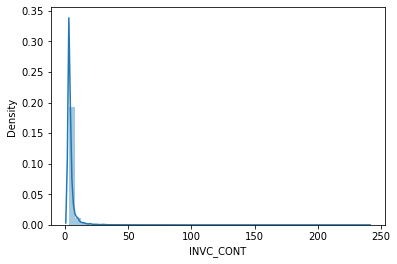

In [381]:
sns.distplot(y_train)

C:\Users\doong\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INVC_CONT', ylabel='Density'>

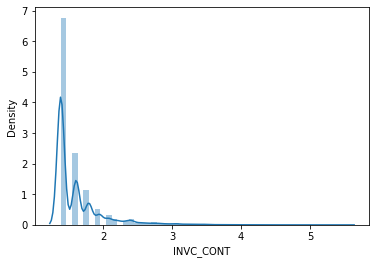

In [382]:
# 로그 변환
y_train_log = np.log1p(y_train)
sns.distplot(y_train_log)

In [384]:
model = LGBMRegressor(random_state=2021,n_estimators=1000, bagging_fraction=0.7, learning_rate=0.1,
                         max_depth=4, subsample=0.7, feature_fraction=0.9, boosting_type='gbdt',
                         reg_lambda=5, n_jobs=-1)

model.fit(X_train, y_train, 
          eval_set = [(X_train, y_train_log), (X_val, y_val)],
          eval_metric = 'rmse',
          early_stopping_rounds=100
         )

C:\Users\doong\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's rmse: 3.17325	valid_0's l2: 10.0695	valid_1's rmse: 5.357	valid_1's l2: 28.6975
[2]	valid_0's rmse: 3.1748	valid_0's l2: 10.0794	valid_1's rmse: 5.34732	valid_1's l2: 28.5939
[3]	valid_0's rmse: 3.17718	valid_0's l2: 10.0945	valid_1's rmse: 5.33803	valid_1's l2: 28.4946
[4]	valid_0's rmse: 3.1807	valid_0's l2: 10.1168	valid_1's rmse: 5.33108	valid_1's l2: 28.4204
[5]	valid_0's rmse: 3.18527	valid_0's l2: 10.146	valid_1's rmse: 5.32572	valid_1's l2: 28.3633
[6]	valid_0's rmse: 3.19046	valid_0's l2: 10.179	valid_1's rmse: 5.31888	valid_1's l2: 28.2905
[7]	valid_0's rmse: 3.19481	valid_0's l2: 10.2068	valid_1's rmse: 5.31514	valid_1's l2: 28.2507
[8]	valid_0's rmse: 3.19918	valid_0's l2: 10.2347	valid_1's rmse: 5.31337	valid_1's l2: 28.2319
[9]	valid_0's rmse: 3.20446	valid_0's l2: 10.2685	valid_1's rmse: 5.30942	valid_1's l2: 28.1899
[10]	valid_0's rmse: 3.21023	valid_0's l2: 10.3056	valid_1's rmse: 5.30771	valid_1's l2: 28.1717
[11]	valid_0's rmse: 3.21547	valid_0's l2: 10

LGBMRegressor(bagging_fraction=0.7, feature_fraction=0.9, max_depth=4,
              n_estimators=1000, random_state=2021, reg_lambda=5,
              subsample=0.7)

In [385]:
test_X = test.iloc[:,8:]
# test_X = test.drop(['SEND_SPG_INNB', 'REC_SPG_INNB'], axis=1)
pred = model.predict(test_X)
ss["INVC_CONT"] = pred

In [386]:
ss

,index,INVC_CONT
0,32000,4.724444
1,32001,4.724444
2,32002,4.724444
3,32003,4.724444
4,32004,4.724444
...,...,...
4635,36635,4.724444
4636,36636,4.724444
4637,36637,4.724444
4638,36638,4.724444


In [387]:
ss.to_csv('sample_submssion_lgbm2.csv',index = False)